# Final Project

### Data Cleanup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## data set downloaded from
data = pd.read_csv('data/billboard-1964-2015-songs-lyrics.zip',encoding = "ISO-8859-1",skipinitialspace=True)
# try reading all data sets
#display(data.head())
print('Shape of data: ', data.shape)
# drop irrelevant columns
data = data.drop(columns=['Rank', 'Source'])
display(data.head())
print("Final data shape: ",data.shape)
print(data.dtypes)

Shape of data:  (5100, 6)


,Song,Artist,Year,Lyrics
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
2,i cant get no satisfaction,the rolling stones,1965,
3,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...


Final data shape:  (5100, 4)
Song      object
Artist    object
Year       int64
Lyrics    object
dtype: object


In [3]:
# strip leading and trailing white space or new line characters
data = data.replace({r'^\s+': '',r'\s+$':'',r'\n':''}, regex=True)
# replace empty string with NaN
data = data.replace({'': np.nan})
data.head()


,Song,Artist,Year,Lyrics
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love you...
2,i cant get no satisfaction,the rolling stones,1965,NaN
3,you were on my mind,we five,1965,when i woke up this morning you were on my min...
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss ...


In [4]:
# drop NA values
data.Lyrics[2]
data = data.dropna()
print('Shape after dropping NA: ',data.shape )
display(data.head())

Shape after dropping NA:  (4866, 4)


,Song,Artist,Year,Lyrics
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love you...
3,you were on my mind,we five,1965,when i woke up this morning you were on my min...
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss ...
5,downtown,petula clark,1965,when youre alone and life is making you lonely...


In [5]:
#sanity check year seems fine no erronous data
year = data['Year'].unique()
year

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [6]:
# lower string
data.Lyrics = data.Lyrics.str.lower()
data.head()

,Song,Artist,Year,Lyrics
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love you...
3,you were on my mind,we five,1965,when i woke up this morning you were on my min...
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss ...
5,downtown,petula clark,1965,when youre alone and life is making you lonely...


## Parameters for word count

In [7]:
# variables needed for word cleanup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print('Initially there are: ',len(stopwords),' stopwords')
# word choice based on initial analysis of old dataset. 
# futhrer choices informed by http://cs.brown.edu/courses/cs100/students/project11/
stopwords+= ['verse','chorus','im','dont','oh','got','get','yeah','you','youre','let','ill','gonna','aint','ive','youll']
print('there are ',len(stopwords),'stopwords')

Initially there are:  179  stopwords
there are  195 stopwords


[nltk_data] Downloading package stopwords to C:\Users\Jing
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Meauring word repitition in individual songs
we would like to evaluate how repititive a song is like Gucci Gang or Daft Punk's all around the world. We want to evaluate how "diverse" a song is. Does the artist only use a few words to compose a long song like in Gucci Gang or Daft Punk's All AROund the World? <br/> <br/>

We thus come up with a measure of this called variance. we will measure the number of unique words the author uses in his song. To avoid stop words artificially inflating their score we will remove stop words. Procedure is as follow:
1. Remove stop words
2. calculate number of unique words
3. calculate song length
$$\text{variance}=\frac{\text{Number of unique words}}{\text{Number of words in song lyrics}}$$
The lower the variance score, the more repitive the song
<br/>

we would also like to avoid the artist using derivative of words (eg. general --> generalized) to boost their variance score therefore we also have a score called variance root 
1. Remove stop words
2. convert all words to thier root words
2. calculate number of unique root words
3. calculate song length
$$\text{variance-root}=\frac{\text{Number of unique root words}}{\text{Number of words in song lyrics}}$$
Conversion to root word is done using the [stemming function](https://pypi.org/project/stemming/)

In [8]:
from stemming.porter2 import stem # this stemming library is used becuase it can work in list comprehension
# remove stop words
data['Filtered Lyrics']=data['Lyrics'].apply(lambda x:[word for word in x.split() if word not in stopwords])
# calculate variance 
data['Variance'] = data['Filtered Lyrics'].apply(lambda x: np.unique(np.array(x)).shape[0]/len(x))
# change all words to root word
data['Variance Root'] = data['Filtered Lyrics'].apply(lambda x:[stem(word) for word in x])
display(data.head())

,Song,Artist,Year,Lyrics,Filtered Lyrics,Variance,Variance Root
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,"[sam, sham, miscellaneous, wooly, bully, wooly...",0.500000,"[sam, sham, miscellan, wooli, bulli, wooli, bu..."
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love you...,"[sugar, pie, honey, bunch, know, love, cant, h...",0.610000,"[sugar, pie, honey, bunch, know, love, cant, h..."
3,you were on my mind,we five,1965,when i woke up this morning you were on my min...,"[woke, morning, mind, mind, troubles, whoaoh, ...",0.462963,"[woke, morn, mind, mind, troubl, whoaoh, worri..."
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss ...,"[never, close, eyes, anymore, kiss, lips, ther...",0.423077,"[never, close, eye, anymor, kiss, lip, there, ..."
5,downtown,petula clark,1965,when youre alone and life is making you lonely...,"[alone, life, making, lonely, always, go, down...",0.647059,"[alon, life, make, lone, alway, go, downtown, ..."


In [9]:
# calculate variance of root words
data['Variance Root'] = data['Variance Root'].apply(lambda x: np.unique(np.array(x)).shape[0]/len(x))

In [10]:
display(data.head())

,Song,Artist,Year,Lyrics,Filtered Lyrics,Variance,Variance Root
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,"[sam, sham, miscellaneous, wooly, bully, wooly...",0.500000,0.500000
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love you...,"[sugar, pie, honey, bunch, know, love, cant, h...",0.610000,0.600000
3,you were on my mind,we five,1965,when i woke up this morning you were on my min...,"[woke, morning, mind, mind, troubles, whoaoh, ...",0.462963,0.462963
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss ...,"[never, close, eyes, anymore, kiss, lips, ther...",0.423077,0.423077
5,downtown,petula clark,1965,when youre alone and life is making you lonely...,"[alone, life, making, lonely, always, go, down...",0.647059,0.630252


In [11]:
# function to analysze word count in pandas dataframe lyrics colume

###########
# Get word count from pandas dataframe
# 
#INPUT: pands dataframe where 'lyrics' column contains song lyrics (alsready pre-processed)
# n--> number of most common words to print out
# PRE-REQ: nltk library stopwrods (with words verse and chorus)
#          matplotlib to plot
#
#OUTPUT: plots bar graph of top 10 words
#################
def word_count(dataframe,n,title):
    lyric=[]
    for words in dataframe['Filtered Lyrics']:
        lyric.extend(words)
    # https://medium.com/@manivannan_data/word-count-using-nlp-python-da7725166d2a
    fdist1 = nltk.FreqDist(lyric)
    #print(n,' most common words: ')
    #print (result)
    count = fdist1.most_common(n)
    words = [x[0] for x in count]
    words_count = [x[1] for x in count]
    plt.figure(figsize=(7,7))
    plt.barh(np.arange(len(words)),words_count, align='center',alpha=0.5)
    plt.yticks(np.arange(len(words)),words)
    plt.gca().invert_yaxis()
    plt.xlabel('Count')
    plt.title(str('Top '+str(n)+' words for '+title+' songs'))
    plt.show()
    return count

## Analyze top N popular words in song by decades


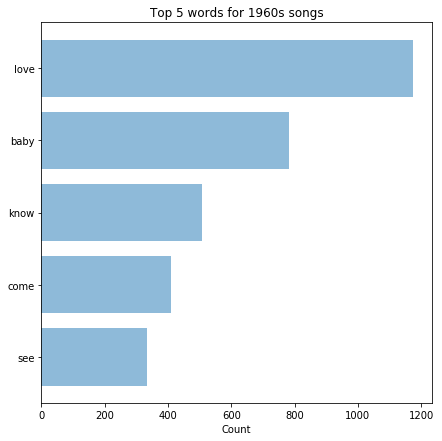

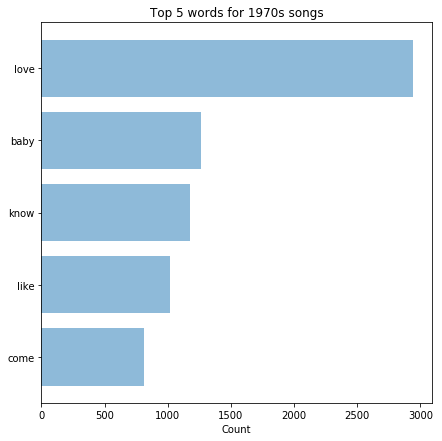

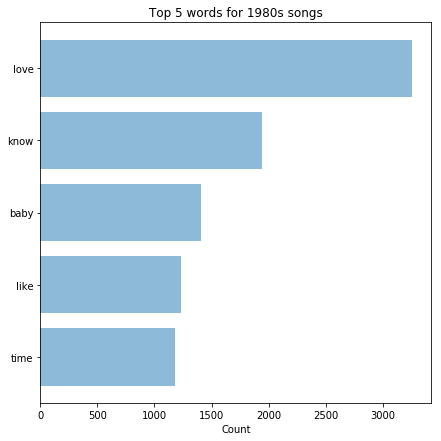

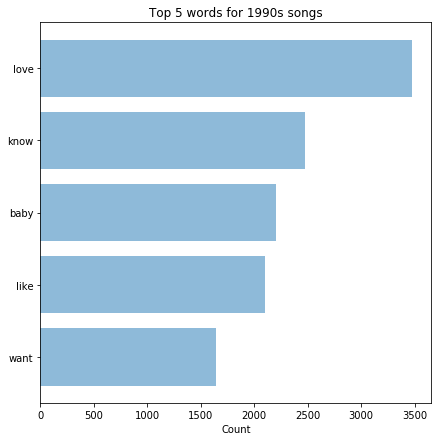

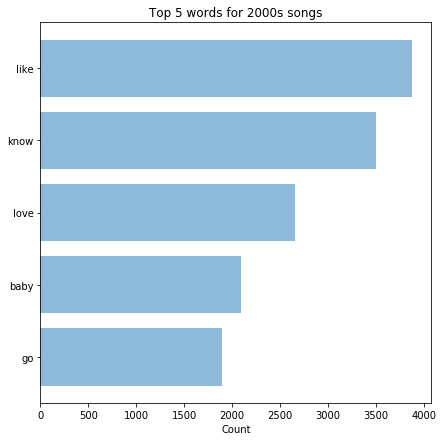

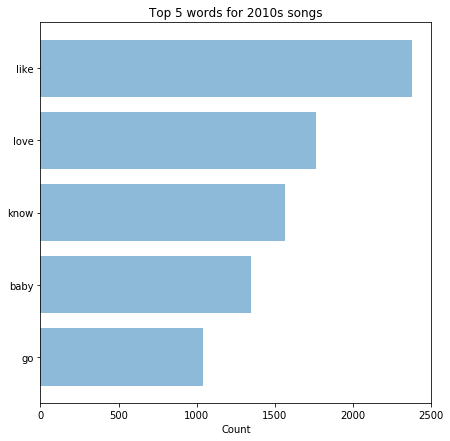

In [12]:
# plot 60s to 2010s --> 
######### CHANGE TOP N SONGS HERE ###########
n=5
word_count_by_decade={}
for i in range(6):
    song = data.loc[data['Year'].between(1960+i*10,1969+i*10,inclusive=True)]
    decade = 1960 + i*10
    count = word_count(song,5,str(decade)+'s')
    word_count_by_decade[decade] = count

In [13]:
print(word_count_by_decade)


{1960: [('love', 1176), ('baby', 783), ('know', 507), ('come', 408), ('see', 334)], 1970: [('love', 2946), ('baby', 1266), ('know', 1173), ('like', 1019), ('come', 815)], 1980: [('love', 3262), ('know', 1942), ('baby', 1404), ('like', 1232), ('time', 1179)], 1990: [('love', 3479), ('know', 2474), ('baby', 2203), ('like', 2102), ('want', 1644)], 2000: [('like', 3880), ('know', 3502), ('love', 2656), ('baby', 2095), ('go', 1893)], 2010: [('like', 2383), ('love', 1764), ('know', 1568), ('baby', 1347), ('go', 1039)]}


### Visualizing top N words by decade
Let's use pandas series [line plot function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html) to better visualize the data

,love,baby,know,come,see,like,time,want,go
decade,,,,,,,,,
1960,1176,783,507,408.0,334.0,NaN,NaN,NaN,NaN
1970,2946,1266,1173,815.0,NaN,1019.0,NaN,NaN,NaN
1980,3262,1404,1942,NaN,NaN,1232.0,1179.0,NaN,NaN
1990,3479,2203,2474,NaN,NaN,2102.0,NaN,1644.0,NaN
2000,2656,2095,3502,NaN,NaN,3880.0,NaN,NaN,1893.0


<Figure size 2880x2880 with 0 Axes>

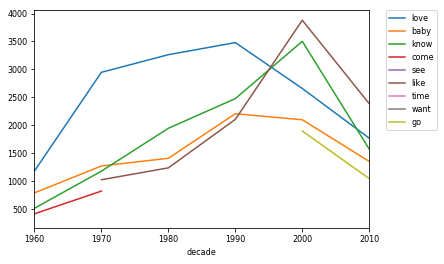

In [14]:
'''
>>> df = pd.DataFrame({
...    'pig': [20, 18, 489, 675, 1776],
...    'horse': [4, 25, 281, 600, 1900]
...    }, index=[1990, 1997, 2003, 2009, 2014])
>>> lines = df.plot.line()
'''
years = word_count_by_decade.keys()
df = pd.DataFrame(index=word_count_by_decade.keys())
top_words={}
for year,value in word_count_by_decade.items():
    value = dict(value)
    for word,count in value.items():
        if word not in top_words.keys():
            top_words[word]=[]
        top_words[word].append((year,count))
#print(top_words)

top_words_plots=[]
for word,series_data in top_words.items():
    df =pd.DataFrame(series_data, columns=['decade', word])
    top_words_plots.append(df)
from functools import reduce
top_words_plots_df = reduce(lambda x, y: x.join(y.set_index('decade'), on='decade',how='outer'), top_words_plots).set_index('decade')
display(top_words_plots_df.head())

plt.figure(figsize=(40,40))
#adjust font size
plt.rcParams.update({'font.size': 8})
line= top_words_plots_df.plot.line()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## Analyze variance score of songs by decade

We utilize boxplots from matplotlib to boxplots of songs through the decade. pandas boxplot function is biult on [matplotlib boxplot function](https://matplotlib.org/gallery/statistics/boxplot_demo.html)

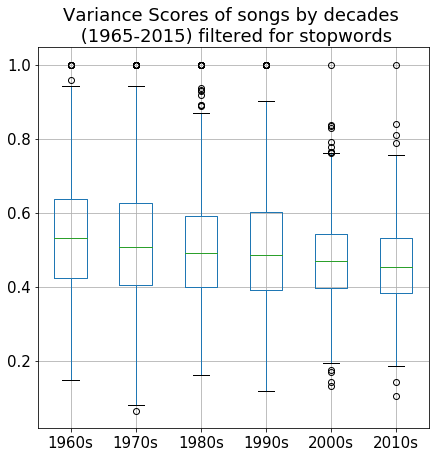

In [15]:
variance_boxplot = {}
for i in range(6):
    variance_scores = data.loc[data['Year'].between(1960+i*10,1969+i*10,inclusive=True)]
    decade = 1960 + i*10
    title = str(decade)+'s'
    variance_boxplot[title] = variance_scores['Variance']
    #display(variance_scores.head())
    
variance_boxplot_df = pd.DataFrame(variance_boxplot)
# adjust size of image
plt.figure(figsize=(7,7))
#adjust font size
plt.rcParams.update({'font.size': 15})
plt.title('Variance Scores of songs by decades \n (1965-2015) filtered for stopwords')
box_plot = variance_boxplot_df.boxplot()

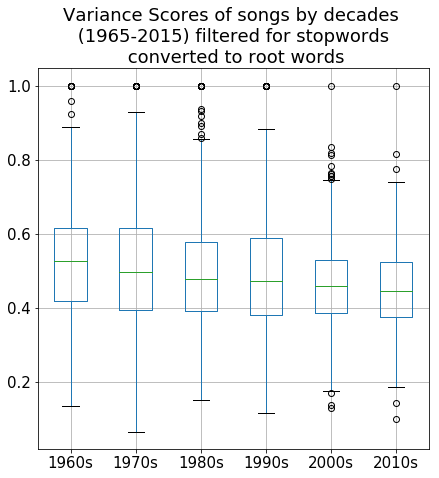

In [16]:
variance_root_boxplot = {}
for i in range(6):
    variance_scores = data.loc[data['Year'].between(1960+i*10,1969+i*10,inclusive=True)]
    decade = 1960 + i*10
    title = str(decade)+'s'
    variance_root_boxplot[title] = variance_scores['Variance Root']
    #display(variance_scores.head())
    
variance_root_boxplot_df = pd.DataFrame(variance_root_boxplot)
# adjust size of image
plt.figure(figsize=(7,7))
#adjust font size
plt.rcParams.update({'font.size': 15})
plt.title('Variance Scores of songs by decades \n (1965-2015) filtered for stopwords \n converted to root words')
box_plot = variance_root_boxplot_df.boxplot()

## Analysis on Beyonce's songs
We see that the top 5 words stay quite constant through the past 50-60 yer